In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt
import os
import sys
from scipy.stats import norm
from sklearn import preprocessing

debug = False

In [8]:
def normalize(x):
    
    X1 = []
    X2 = []
    for i in x:
        X1.append(i[0])
        X2.append(i[1])
    
    mean = np.mean(X1)
    std = np.std(X1)
    
    X1 = X1-mean
    X1=X1/std
    
    mean = np.mean(X2)
    std = np.std(X2)
        
    X2 = X2-mean
    X2=X2/std
    
    x=[]
    
    for i in range(len(X2)):
        x.append([X1[i],X2[i]])
    
    return x

In [3]:
X = genfromtxt('data/q4/q4x.dat')
Y = genfromtxt('data/q4/q4y.dat',dtype='U')

Y_normal = []

for i in Y:
    if(i=='Alaska'):
        Y_normal.append([int(1)])
    else:
        Y_normal.append([int(0)])
Y = np.array(Y)
X = np.array(X)     

X_normal = normalize(X)
X_normal = np.array(X_normal).reshape((-1,2,1))
Y_normal = np.array(Y_normal).reshape((-1,1))

tmp1 = 0
tmp2 = 0

tmp3 = np.zeros((2,1))
tmp4 = np.zeros((2,1))

for i in range(X_normal.shape[0]):

    if(Y_normal[i][0]==0):
        tmp1+=1
        tmp3+=X_normal[i]
        #for j in range(2):
        #    tmp3[j] += X_normal[i][j]
    else:
        tmp2+=1
        tmp4+=X_normal[i]
        #for j in range(2):
        #    tmp4[j] += X_normal[i][j]

mew_0 = tmp3/tmp1
mew_1 = tmp4/tmp2
mew = np.array([mew_0,mew_1])

# # of times y(i) = 1 in the data / # of examples
phi = tmp2/X_normal.shape[0]

etha = np.zeros((2,2))

for i in range(X_normal.shape[0]):
    etha += np.dot(X_normal[i] - mew[Y_normal[i][0]], (X_normal[i] - mew[Y_normal[i][0]]).transpose() )
etha = etha/X_normal.shape[0]

# print("Phi :",phi)
# print("\nmew0 :\n",mew_0)
# print("\nmew1 :\n",mew_1)
# print("\nCovariance matrix :\n",etha)

In [5]:
X1 = []
Y1 = []

X2 = []
Y2 = []

for i in range(Y_normal.shape[0]):
    if(Y_normal[i]==0):
        X1.append(X_normal[i][0])
        Y1.append(X_normal[i][1])
    else:
        X2.append(X_normal[i][0])
        Y2.append(X_normal[i][1])
        
c = np.log(phi/(1-phi))
term1 = 0.5 * (np.dot(np.dot(mew[0].T,np.linalg.inv(etha)),mew[0]) - np.dot(np.dot(mew[1].T,np.linalg.inv(etha)),mew[1]))
term2 = np.dot((mew[0] - mew[1]).transpose(),np.linalg.inv(etha))


X3 = []
Y3 = []

# term2[0]*X[0] + term2[1]*X[1] = term1  - c
for i in range(X.shape[0]):
    X3.append(X_normal[i][0])
    k=((term1 -c - term2[0][0]*X_normal[i][0])/term2[0][1])
    Y3.append(k[0][0])



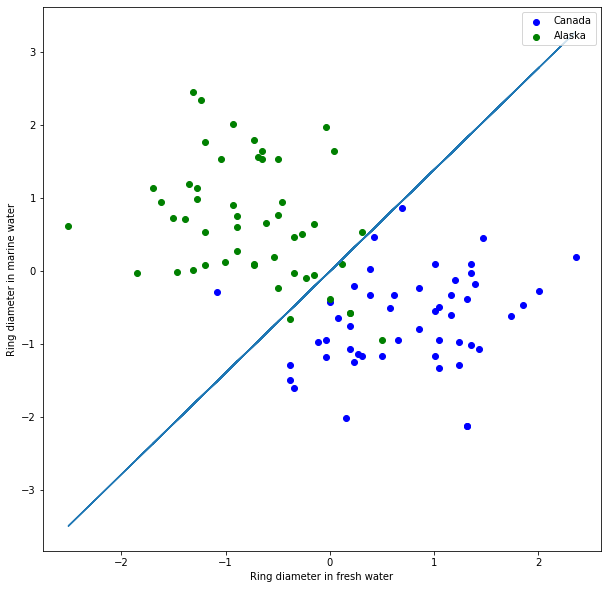

In [7]:
c = np.log(phi/(1-phi))
term1 = 0.5 * (np.dot(np.dot(mew[0].T,np.linalg.inv(etha)),mew[0]) - np.dot(np.dot(mew[1].T,np.linalg.inv(etha)),mew[1]))
term2 = np.dot((mew[0] - mew[1]).transpose(),np.linalg.inv(etha))


X3 = []
Y3 = []

# term2[0]*X[0] + term2[1]*X[1] = term1  - c
for i in range(X.shape[0]):
    X3.append(X_normal[i][0])
    k=((term1 -c - term2[0][0]*X_normal[i][0])/term2[0][1])
    Y3.append(k[0][0])

    
plt.figure(figsize=(10,10))
plt.scatter(X1, Y1, label = 'Canada',color="blue")
plt.scatter(X2, Y2, label ='Alaska',color="green")
plt.plot(X3,Y3)
plt.legend(loc='upper right')
plt.xlabel("Ring diameter in fresh water")
plt.ylabel("Ring diameter in marine water")
plt.title("Gaussian Discrmimant Analysis - Linear plot")
plt.savefig('output/Ques4(C).png')
plt.show()